# 1. Install Dependencies and Setup

In [3]:
import tensorflow as tf
import os
from sklearn import metrics
import random as python_random
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras
import math

find . -name "*.DS_Store" -type f -delete # use in terminal if data doesn't load first time (mac issue)

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
# data_dir = 'data' 

train_dir = './augmentedData/Train/'
test_dir = './augmentedData/Test/'
batch_dir = './batchdata/Train/'


In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [8]:
for image_class in os.listdir(batch_dir): 
    for image in os.listdir(os.path.join(batch_dir, image_class)):
        image_path = os.path.join(batch_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

Total_train_data aangemaakt om balans tussen klassen in de set weer te geven

In [9]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable
total_train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=4000)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(100, 100),)
batch_data = tf.keras.utils.image_dataset_from_directory(batch_dir, batch_size=80, image_size=(100, 100),)

Found 4000 files belonging to 4 classes.


2022-11-17 15:02:05.286523: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 4000 files belonging to 4 classes.
Found 80 files belonging to 4 classes.


In [10]:
    for element in batch_data.as_numpy_iterator(): 
        X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

{0: 4, 1: 72, 2: 1, 3: 3}

In [11]:
# data_iterator = data.as_numpy_iterator()
train_iterator = train_data.as_numpy_iterator()

In [12]:
batch_iterator = batch_data.as_numpy_iterator()

In [13]:
# batch = data_iterator.next()
train_batch = train_iterator.next()

2022-11-17 15:02:25.436562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:02:25.436738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [14]:
batch_batch = batch_iterator.next()

VISUALISE TRAIN AND TEST DATA

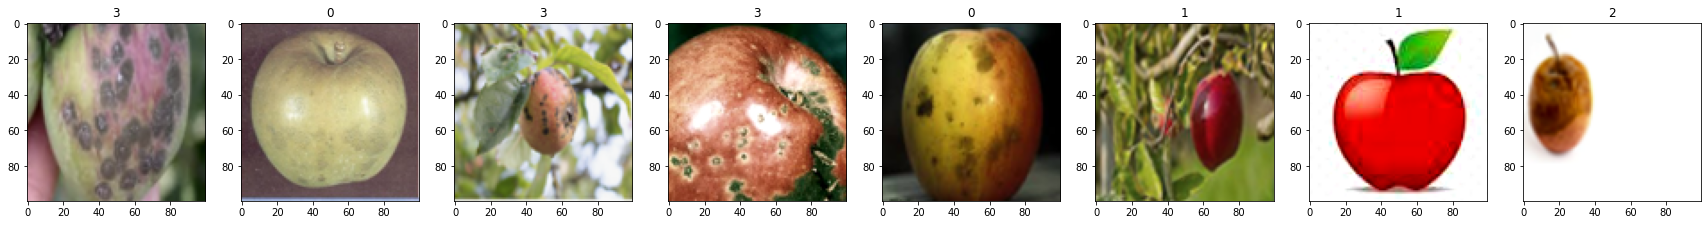

In [15]:
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(train_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

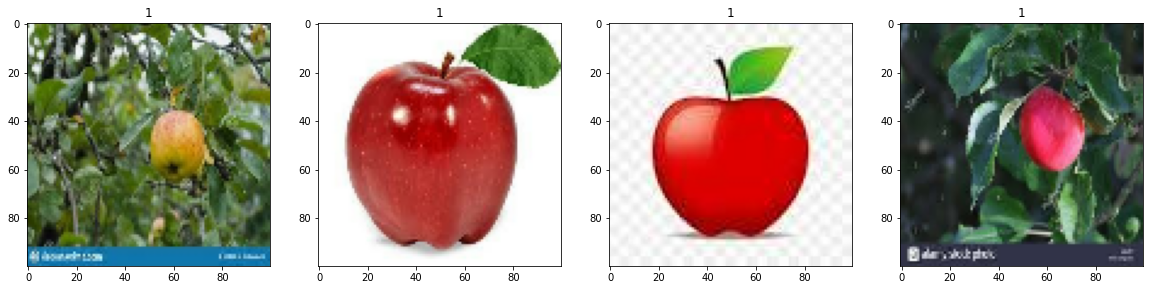

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch_batch[1][idx])

# 4. Scale Data

In [17]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [18]:
batch_data = batch_data.map(lambda x,y: (x/255, y))

In [19]:
train_data.as_numpy_iterator().next()

2022-11-17 15:02:46.115414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:02:46.115718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[0.3647059 , 0.4509804 , 0.48235294],
          [0.4       , 0.45882353, 0.4509804 ],
          [0.45882353, 0.5019608 , 0.49019608],
          ...,
          [0.91764706, 0.98039216, 1.        ],
          [0.85882354, 0.9411765 , 1.        ],
          [0.8       , 0.8980392 , 1.        ]],
 
         [[0.3529412 , 0.41568628, 0.4       ],
          [0.39215687, 0.43529412, 0.35686275],
          [0.43529412, 0.45490196, 0.38039216],
          ...,
          [0.92156863, 0.9882353 , 1.        ],
          [0.8745098 , 0.9490196 , 1.        ],
          [0.8156863 , 0.9019608 , 1.        ]],
 
         [[0.33333334, 0.3764706 , 0.3019608 ],
          [0.37254903, 0.39215687, 0.23137255],
          [0.39215687, 0.37254903, 0.19607843],
          ...,
          [0.93333334, 0.99607843, 1.        ],
          [0.88235295, 0.95686275, 1.        ],
          [0.83137256, 0.9137255 , 1.        ]],
 
         ...,
 
         [[0.43529412, 0.31764707, 0.03529412],
          [0.4    

In [20]:
batch_data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9372549 , 0.9372549 , 0.9372549 ],
          ...,
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.96862745, 0.96862745, 0.96862745],
          [0.9529412 , 0.9529412 , 0.9529412 ]],
 
         [[0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9529412 , 0.9529412 , 0.9529412 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          ...,
          [0.95686275, 0.95686275, 0.95686275],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9764706 , 0.9764706 , 0.9764706 ]],
 
         [[0.9254902 , 0.9254902 , 0.9254902 ],
          [0.92156863, 0.92156863, 0.92156863],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          ...,
          [0.93333334, 0.93333334, 0.93333334],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9882353 , 0.9882353 , 0.9882353 ]],
 
         ...,
 
         [[0.9607843 , 0.9607843 , 0.9607843 ],
          [0.94117

# 5. Split Data

In [22]:
imageCountTrain = len(train_data)
print (imageCountTrain)
imageCountBatch = len(batch_data)
print (imageCountBatch)

125
1


In [23]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
batch_size = int(len(batch_data))

In [51]:
print (train_size)

100


train_size

In [26]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
batch = batch_data.take(batch_size)

# 6. Build Deep Learning Model

In [55]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
# Define a simple sequential model
num_classes = 4
# lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
# nrOfEpochs = 5
img_height = 100
img_width = 100
image_size=(img_height, img_width)
batch_size = 128

opt = tf.keras.optimizers.Adam(learning_rate=0.001)


def create_model():
  model = tf.keras.Sequential([
    keras.layers.Conv2D(32, 3,input_shape=(img_height, img_width, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense ((num_classes),activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

# 7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
# tf.random.set_seed(221)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
  1/100 [..............................] - ETA: 1:04 - loss: 1.3861 - sparse_categorical_accuracy: 0.3125

2022-11-17 15:06:48.437819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:48.437890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:48.461376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:48.475357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:48.475445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:48.499033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 10s - loss: 1.4443 - sparse_categorical_accuracy: 0.3333

2022-11-17 15:06:48.733236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 8s - loss: 1.2809 - sparse_categorical_accuracy: 0.4107

2022-11-17 15:06:50.672341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/100 [========>.....................] - ETA: 7s - loss: 1.2462 - sparse_categorical_accuracy: 0.4271

2022-11-17 15:06:51.691396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 7s - loss: 1.2099 - sparse_categorical_accuracy: 0.4536

2022-11-17 15:06:52.214876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:52.322458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/100 [==========>...................] - ETA: 6s - loss: 1.1942 - sparse_categorical_accuracy: 0.4720

2022-11-17 15:06:52.540050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:52.638088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/100 [===========>..................] - ETA: 6s - loss: 1.1795 - sparse_categorical_accuracy: 0.4754

2022-11-17 15:06:52.844464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 5s - loss: 1.1604 - sparse_categorical_accuracy: 0.4871

2022-11-17 15:06:53.250779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:53.442036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/100 [=============>................] - ETA: 5s - loss: 1.1481 - sparse_categorical_accuracy: 0.4930

2022-11-17 15:06:53.550651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/100 [================>.............] - ETA: 4s - loss: 1.1217 - sparse_categorical_accuracy: 0.5093

2022-11-17 15:06:54.322411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:54.322603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:54.507543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/100 [=================>............] - ETA: 3s - loss: 1.1026 - sparse_categorical_accuracy: 0.5203

2022-11-17 15:06:54.901077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:55.086227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/100 [==================>...........] - ETA: 3s - loss: 1.0896 - sparse_categorical_accuracy: 0.5289

2022-11-17 15:06:55.189386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:55.189643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:55.299868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 2s - loss: 1.0717 - sparse_categorical_accuracy: 0.5403

2022-11-17 15:06:56.160562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:56.251669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/100 [======================>.......] - ETA: 2s - loss: 1.0618 - sparse_categorical_accuracy: 0.5467

2022-11-17 15:06:56.430274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/100 [=========================>....] - ETA: 1s - loss: 1.0393 - sparse_categorical_accuracy: 0.5550

2022-11-17 15:06:57.199694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:57.394838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 93/100 [==========================>...] - ETA: 0s - loss: 1.0271 - sparse_categorical_accuracy: 0.5628

2022-11-17 15:06:57.784349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/100 [============================>.] - ETA: 0s - loss: 1.0163 - sparse_categorical_accuracy: 0.5685

2022-11-17 15:06:58.364640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 1.0178 - sparse_categorical_accuracy: 0.5681

2022-11-17 15:06:58.812367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:58.812422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:58.830054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:58.841337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:58.841578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:58.852039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:58.855530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:58.903680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:58.929728: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 12s 111ms/step - loss: 1.0178 - sparse_categorical_accuracy: 0.5681 - val_loss: 0.8607 - val_sparse_categorical_accuracy: 0.6363
Epoch 2/10
  1/100 [..............................] - ETA: 17s - loss: 0.5245 - sparse_categorical_accuracy: 0.7812

2022-11-17 15:06:59.701458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:59.701577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:59.742300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:59.776695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:59.776889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:59.807059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:06:59.857474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 7s - loss: 0.7610 - sparse_categorical_accuracy: 0.7009

2022-11-17 15:07:01.579868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/100 [========>.....................] - ETA: 6s - loss: 0.7645 - sparse_categorical_accuracy: 0.7094

2022-11-17 15:07:02.456433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.7513 - sparse_categorical_accuracy: 0.7152

2022-11-17 15:07:02.941599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:03.030778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 5s - loss: 0.7459 - sparse_categorical_accuracy: 0.7179

2022-11-17 15:07:03.227769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:03.331603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 5s - loss: 0.7320 - sparse_categorical_accuracy: 0.7248

2022-11-17 15:07:03.535275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.7329 - sparse_categorical_accuracy: 0.7229

2022-11-17 15:07:03.926452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:04.113757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/100 [=============>................] - ETA: 5s - loss: 0.7257 - sparse_categorical_accuracy: 0.7233

2022-11-17 15:07:04.219025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.7190 - sparse_categorical_accuracy: 0.7277

2022-11-17 15:07:04.982935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:04.983369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:05.170360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.7060 - sparse_categorical_accuracy: 0.7334

2022-11-17 15:07:05.571160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:05.748571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/100 [==================>...........] - ETA: 3s - loss: 0.7026 - sparse_categorical_accuracy: 0.7346

2022-11-17 15:07:05.848528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:05.848663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:05.955643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 2s - loss: 0.6997 - sparse_categorical_accuracy: 0.7387

2022-11-17 15:07:06.812675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:06.906556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/100 [======================>.......] - ETA: 2s - loss: 0.6902 - sparse_categorical_accuracy: 0.7444

2022-11-17 15:07:07.103486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/100 [========================>.....] - ETA: 1s - loss: 0.6837 - sparse_categorical_accuracy: 0.7460

2022-11-17 15:07:07.894760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:08.067446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/100 [==========================>...] - ETA: 0s - loss: 0.6751 - sparse_categorical_accuracy: 0.7507

2022-11-17 15:07:08.465383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/100 [============================>.] - ETA: 0s - loss: 0.6653 - sparse_categorical_accuracy: 0.7538

2022-11-17 15:07:09.046443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.6650 - sparse_categorical_accuracy: 0.7538

2022-11-17 15:07:09.342089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:09.489570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:09.489831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:09.511060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:09.525545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:09.525914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:09.537661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:09.540614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:09.605844: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 11s 106ms/step - loss: 0.6650 - sparse_categorical_accuracy: 0.7538 - val_loss: 0.5867 - val_sparse_categorical_accuracy: 0.7775
Epoch 3/10
  1/100 [..............................] - ETA: 16s - loss: 0.4185 - sparse_categorical_accuracy: 0.8750

2022-11-17 15:07:10.435216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:10.435309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:10.458415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:10.471120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:10.471159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:10.483031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:10.588323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 7s - loss: 0.5075 - sparse_categorical_accuracy: 0.8378

2022-11-17 15:07:12.306914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/100 [========>.....................] - ETA: 6s - loss: 0.4958 - sparse_categorical_accuracy: 0.8333

2022-11-17 15:07:13.168795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.4910 - sparse_categorical_accuracy: 0.8321

2022-11-17 15:07:13.644906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:13.742205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 5s - loss: 0.4906 - sparse_categorical_accuracy: 0.8339

2022-11-17 15:07:13.955961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:14.052383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 5s - loss: 0.5026 - sparse_categorical_accuracy: 0.8285

2022-11-17 15:07:14.244266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.4946 - sparse_categorical_accuracy: 0.8313

2022-11-17 15:07:14.639612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:14.823515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/100 [=============>................] - ETA: 5s - loss: 0.4914 - sparse_categorical_accuracy: 0.8333

2022-11-17 15:07:14.930429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.4810 - sparse_categorical_accuracy: 0.8371

2022-11-17 15:07:15.716746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:15.716907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:15.895321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.4692 - sparse_categorical_accuracy: 0.8412

2022-11-17 15:07:16.289340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:16.473824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/100 [==================>...........] - ETA: 3s - loss: 0.4709 - sparse_categorical_accuracy: 0.8394

2022-11-17 15:07:16.569420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:16.569710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:16.676505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 2s - loss: 0.4570 - sparse_categorical_accuracy: 0.8467

2022-11-17 15:07:17.588017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:17.682954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/100 [======================>.......] - ETA: 2s - loss: 0.4513 - sparse_categorical_accuracy: 0.8490

2022-11-17 15:07:17.866877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/100 [========================>.....] - ETA: 1s - loss: 0.4435 - sparse_categorical_accuracy: 0.8517

2022-11-17 15:07:18.649347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:18.845720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/100 [==========================>...] - ETA: 0s - loss: 0.4326 - sparse_categorical_accuracy: 0.8550

2022-11-17 15:07:19.232038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/100 [============================>.] - ETA: 0s - loss: 0.4313 - sparse_categorical_accuracy: 0.8552

2022-11-17 15:07:19.814829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.4303 - sparse_categorical_accuracy: 0.8556

2022-11-17 15:07:20.100902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:20.239032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:20.239223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:20.260130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:20.273940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:20.274040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:20.288647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:20.292301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:20.349831: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 11s 107ms/step - loss: 0.4303 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.3977 - val_sparse_categorical_accuracy: 0.8413
Epoch 4/10
  1/100 [..............................] - ETA: 16s - loss: 0.3073 - sparse_categorical_accuracy: 0.9062

2022-11-17 15:07:21.209251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:21.209304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:21.237795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:21.253235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:21.253297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:21.273439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:21.360761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 7s - loss: 0.3440 - sparse_categorical_accuracy: 0.8988

2022-11-17 15:07:23.072960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/100 [========>.....................] - ETA: 6s - loss: 0.3564 - sparse_categorical_accuracy: 0.8885

2022-11-17 15:07:23.945337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.3594 - sparse_categorical_accuracy: 0.8839

2022-11-17 15:07:24.419074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:24.513779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 5s - loss: 0.3533 - sparse_categorical_accuracy: 0.8840

2022-11-17 15:07:24.717113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:24.808818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 5s - loss: 0.3489 - sparse_categorical_accuracy: 0.8857

2022-11-17 15:07:25.011630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.3451 - sparse_categorical_accuracy: 0.8868

2022-11-17 15:07:25.412945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/100 [=============>................] - ETA: 5s - loss: 0.3414 - sparse_categorical_accuracy: 0.8876

2022-11-17 15:07:25.614011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:25.716543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.3383 - sparse_categorical_accuracy: 0.8862

2022-11-17 15:07:26.497181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:26.497286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:26.692714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.3285 - sparse_categorical_accuracy: 0.8891

2022-11-17 15:07:27.093086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:27.284979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/100 [==================>...........] - ETA: 3s - loss: 0.3240 - sparse_categorical_accuracy: 0.8899

2022-11-17 15:07:27.461993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:27.462365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:27.568575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 2s - loss: 0.3120 - sparse_categorical_accuracy: 0.8929

2022-11-17 15:07:28.427298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:28.527015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/100 [======================>.......] - ETA: 2s - loss: 0.3092 - sparse_categorical_accuracy: 0.8930

2022-11-17 15:07:28.728523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/100 [========================>.....] - ETA: 1s - loss: 0.2993 - sparse_categorical_accuracy: 0.8972

2022-11-17 15:07:29.529376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:29.709446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/100 [==========================>...] - ETA: 0s - loss: 0.2985 - sparse_categorical_accuracy: 0.8978

2022-11-17 15:07:30.102643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/100 [============================>.] - ETA: 0s - loss: 0.2966 - sparse_categorical_accuracy: 0.8989

2022-11-17 15:07:30.673041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.2972 - sparse_categorical_accuracy: 0.8988

2022-11-17 15:07:30.961799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:31.106748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:31.107415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:31.129767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:31.147442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:31.147606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:31.164180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:31.168757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:31.235416: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 11s 108ms/step - loss: 0.2972 - sparse_categorical_accuracy: 0.8988 - val_loss: 0.2806 - val_sparse_categorical_accuracy: 0.9112
Epoch 5/10
  1/100 [..............................] - ETA: 17s - loss: 0.0867 - sparse_categorical_accuracy: 1.0000

2022-11-17 15:07:32.105540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:32.105615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:32.133175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:32.156151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:32.157085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:32.175239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:32.261474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 7s - loss: 0.1944 - sparse_categorical_accuracy: 0.9435

2022-11-17 15:07:33.979339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/100 [========>.....................] - ETA: 6s - loss: 0.2008 - sparse_categorical_accuracy: 0.9354

2022-11-17 15:07:34.843818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.2023 - sparse_categorical_accuracy: 0.9330

2022-11-17 15:07:35.325784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:35.428526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 5s - loss: 0.1985 - sparse_categorical_accuracy: 0.9326

2022-11-17 15:07:35.622745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:35.720522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 5s - loss: 0.1927 - sparse_categorical_accuracy: 0.9360

2022-11-17 15:07:35.920196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.2009 - sparse_categorical_accuracy: 0.9340

2022-11-17 15:07:36.335428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:36.533066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/100 [=============>................] - ETA: 5s - loss: 0.2028 - sparse_categorical_accuracy: 0.9336

2022-11-17 15:07:36.642904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.2116 - sparse_categorical_accuracy: 0.9325

2022-11-17 15:07:37.402586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:37.409021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:37.586865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.2103 - sparse_categorical_accuracy: 0.9330

2022-11-17 15:07:38.019251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:38.217455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/100 [==================>...........] - ETA: 3s - loss: 0.2089 - sparse_categorical_accuracy: 0.9326

2022-11-17 15:07:38.332739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:38.332933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:38.442481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 2s - loss: 0.2005 - sparse_categorical_accuracy: 0.9362

2022-11-17 15:07:39.303933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:39.406711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/100 [======================>.......] - ETA: 2s - loss: 0.1981 - sparse_categorical_accuracy: 0.9371

2022-11-17 15:07:39.596174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/100 [========================>.....] - ETA: 1s - loss: 0.1981 - sparse_categorical_accuracy: 0.9375

2022-11-17 15:07:40.378375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:40.561896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/100 [==========================>...] - ETA: 0s - loss: 0.1958 - sparse_categorical_accuracy: 0.9375

2022-11-17 15:07:40.959113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/100 [============================>.] - ETA: 0s - loss: 0.1912 - sparse_categorical_accuracy: 0.9397

2022-11-17 15:07:41.547392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.1916 - sparse_categorical_accuracy: 0.9406

2022-11-17 15:07:41.845642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:41.998709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:41.998805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:42.020258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:42.038511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:42.038992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:42.057169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:42.060882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:42.120782: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 11s 108ms/step - loss: 0.1916 - sparse_categorical_accuracy: 0.9406 - val_loss: 0.2025 - val_sparse_categorical_accuracy: 0.9325
Epoch 6/10
  1/100 [..............................] - ETA: 17s - loss: 0.1446 - sparse_categorical_accuracy: 0.9375

2022-11-17 15:07:43.002732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:43.002791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:43.031024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:43.048210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:43.048252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:43.077183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:43.160402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 7s - loss: 0.1202 - sparse_categorical_accuracy: 0.9658

2022-11-17 15:07:44.888318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/100 [========>.....................] - ETA: 6s - loss: 0.1180 - sparse_categorical_accuracy: 0.9656

2022-11-17 15:07:45.767198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.1210 - sparse_categorical_accuracy: 0.9634

2022-11-17 15:07:46.256937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:46.366038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 6s - loss: 0.1229 - sparse_categorical_accuracy: 0.9605

2022-11-17 15:07:46.560308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:46.665749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 5s - loss: 0.1227 - sparse_categorical_accuracy: 0.9609

2022-11-17 15:07:46.852207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.1232 - sparse_categorical_accuracy: 0.9611

2022-11-17 15:07:47.261778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:47.443857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/100 [=============>................] - ETA: 5s - loss: 0.1200 - sparse_categorical_accuracy: 0.9628

2022-11-17 15:07:47.542110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.1147 - sparse_categorical_accuracy: 0.9643

2022-11-17 15:07:48.320870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:48.321187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:48.509441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.1118 - sparse_categorical_accuracy: 0.9642

2022-11-17 15:07:48.913628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:49.103552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/100 [==================>...........] - ETA: 3s - loss: 0.1125 - sparse_categorical_accuracy: 0.9644

2022-11-17 15:07:49.211851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:49.211894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:49.318918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 2s - loss: 0.1107 - sparse_categorical_accuracy: 0.9646

2022-11-17 15:07:50.180043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:50.280511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/100 [======================>.......] - ETA: 2s - loss: 0.1109 - sparse_categorical_accuracy: 0.9643

2022-11-17 15:07:50.474522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/100 [========================>.....] - ETA: 1s - loss: 0.1087 - sparse_categorical_accuracy: 0.9658

2022-11-17 15:07:51.268811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:51.453948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/100 [==========================>...] - ETA: 0s - loss: 0.1091 - sparse_categorical_accuracy: 0.9657

2022-11-17 15:07:51.865623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/100 [============================>.] - ETA: 0s - loss: 0.1084 - sparse_categorical_accuracy: 0.9662

2022-11-17 15:07:52.451468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.1076 - sparse_categorical_accuracy: 0.9669

2022-11-17 15:07:52.741134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:52.889050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:52.889271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:52.910696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:52.927765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:52.927860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:52.946543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:52.950133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:53.020253: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 11s 108ms/step - loss: 0.1076 - sparse_categorical_accuracy: 0.9669 - val_loss: 0.1253 - val_sparse_categorical_accuracy: 0.9625
Epoch 7/10
  1/100 [..............................] - ETA: 16s - loss: 0.0561 - sparse_categorical_accuracy: 1.0000

2022-11-17 15:07:53.940329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:53.940369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:53.981691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:54.008524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:54.008937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:54.052972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 11s - loss: 0.0594 - sparse_categorical_accuracy: 0.9896

2022-11-17 15:07:54.200163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/100 [=====>........................] - ETA: 7s - loss: 0.0679 - sparse_categorical_accuracy: 0.9830

2022-11-17 15:07:56.023821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/100 [========>.....................] - ETA: 6s - loss: 0.0716 - sparse_categorical_accuracy: 0.9798

2022-11-17 15:07:56.911937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/100 [=========>....................] - ETA: 6s - loss: 0.0710 - sparse_categorical_accuracy: 0.9792

2022-11-17 15:07:57.400311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:57.489336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/100 [==========>...................] - ETA: 6s - loss: 0.0685 - sparse_categorical_accuracy: 0.9800

2022-11-17 15:07:57.694705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:57.799045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/100 [===========>..................] - ETA: 5s - loss: 0.0691 - sparse_categorical_accuracy: 0.9792

2022-11-17 15:07:58.002941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.0707 - sparse_categorical_accuracy: 0.9792

2022-11-17 15:07:58.409211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/100 [=============>................] - ETA: 5s - loss: 0.0756 - sparse_categorical_accuracy: 0.9759

2022-11-17 15:07:58.622111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:58.734322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/100 [================>.............] - ETA: 4s - loss: 0.0779 - sparse_categorical_accuracy: 0.9748

2022-11-17 15:07:59.503945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:59.505045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:07:59.682945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/100 [=================>............] - ETA: 3s - loss: 0.0732 - sparse_categorical_accuracy: 0.9772

2022-11-17 15:08:00.086825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:00.264055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/100 [==================>...........] - ETA: 3s - loss: 0.0741 - sparse_categorical_accuracy: 0.9768

2022-11-17 15:08:00.363314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:00.363553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:00.470212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 2s - loss: 0.0772 - sparse_categorical_accuracy: 0.9753

2022-11-17 15:08:01.341301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:01.440695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/100 [======================>.......] - ETA: 2s - loss: 0.0772 - sparse_categorical_accuracy: 0.9759

2022-11-17 15:08:01.641952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/100 [=========================>....] - ETA: 1s - loss: 0.0766 - sparse_categorical_accuracy: 0.9763

2022-11-17 15:08:02.430528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:02.607179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 93/100 [==========================>...] - ETA: 0s - loss: 0.0791 - sparse_categorical_accuracy: 0.9755

2022-11-17 15:08:03.002199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/100 [============================>.] - ETA: 0s - loss: 0.0795 - sparse_categorical_accuracy: 0.9751

2022-11-17 15:08:03.599270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0819 - sparse_categorical_accuracy: 0.9741

2022-11-17 15:08:03.937425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:03.937509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:03.962085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:03.983330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:03.983394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:04.006650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:04.009943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:04.066816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:04.102740: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 11s 110ms/step - loss: 0.0819 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.1616 - val_sparse_categorical_accuracy: 0.9538
Epoch 8/10
  1/100 [..............................] - ETA: 16s - loss: 0.0451 - sparse_categorical_accuracy: 0.9688

2022-11-17 15:08:05.025310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:05.025521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:05.070121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:05.092205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:05.092282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:05.106207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:05.173632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 7s - loss: 0.0827 - sparse_categorical_accuracy: 0.9658

2022-11-17 15:08:06.942708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/100 [========>.....................] - ETA: 6s - loss: 0.0863 - sparse_categorical_accuracy: 0.9667

2022-11-17 15:08:07.819240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.0822 - sparse_categorical_accuracy: 0.9679

2022-11-17 15:08:08.307501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:08.405394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 6s - loss: 0.0835 - sparse_categorical_accuracy: 0.9679

2022-11-17 15:08:08.605886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:08.708755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 5s - loss: 0.0811 - sparse_categorical_accuracy: 0.9695

2022-11-17 15:08:08.910880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.0774 - sparse_categorical_accuracy: 0.9715

2022-11-17 15:08:09.318362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:09.510516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/100 [=============>................] - ETA: 5s - loss: 0.0766 - sparse_categorical_accuracy: 0.9720

2022-11-17 15:08:09.612737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.0750 - sparse_categorical_accuracy: 0.9743

2022-11-17 15:08:10.397424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:10.397669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:10.590952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.0749 - sparse_categorical_accuracy: 0.9748

2022-11-17 15:08:10.989655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:11.173331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/100 [==================>...........] - ETA: 3s - loss: 0.0776 - sparse_categorical_accuracy: 0.9740

2022-11-17 15:08:11.279492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:11.279564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:11.384791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 2s - loss: 0.0820 - sparse_categorical_accuracy: 0.9737

2022-11-17 15:08:12.277192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:12.379923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/100 [======================>.......] - ETA: 2s - loss: 0.0807 - sparse_categorical_accuracy: 0.9740

2022-11-17 15:08:12.581908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/100 [========================>.....] - ETA: 1s - loss: 0.0781 - sparse_categorical_accuracy: 0.9749

2022-11-17 15:08:13.375116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:13.550578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/100 [==========================>...] - ETA: 0s - loss: 0.0766 - sparse_categorical_accuracy: 0.9759

2022-11-17 15:08:13.955338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/100 [============================>.] - ETA: 0s - loss: 0.0765 - sparse_categorical_accuracy: 0.9754

2022-11-17 15:08:14.563785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0763 - sparse_categorical_accuracy: 0.9756

2022-11-17 15:08:14.860129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:15.010142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:15.010192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:15.032691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:15.055889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:15.056060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:15.074521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:15.079113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:15.157774: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 11s 110ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9756 - val_loss: 0.1141 - val_sparse_categorical_accuracy: 0.9638
Epoch 9/10
  1/100 [..............................] - ETA: 18s - loss: 0.0282 - sparse_categorical_accuracy: 1.0000

2022-11-17 15:08:16.084795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:16.085065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:16.112404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:16.128311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:16.128896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:16.144207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:16.250191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 7s - loss: 0.0883 - sparse_categorical_accuracy: 0.9702

2022-11-17 15:08:18.020804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/100 [========>.....................] - ETA: 6s - loss: 0.0752 - sparse_categorical_accuracy: 0.9740

2022-11-17 15:08:18.938567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 6s - loss: 0.0731 - sparse_categorical_accuracy: 0.9741

2022-11-17 15:08:19.429082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:19.529322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 6s - loss: 0.0743 - sparse_categorical_accuracy: 0.9737

2022-11-17 15:08:19.730123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:19.830341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 5s - loss: 0.0701 - sparse_categorical_accuracy: 0.9756

2022-11-17 15:08:20.026674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.0731 - sparse_categorical_accuracy: 0.9757

2022-11-17 15:08:20.501761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:20.696631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/100 [=============>................] - ETA: 5s - loss: 0.0708 - sparse_categorical_accuracy: 0.9767

2022-11-17 15:08:20.796324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 4s - loss: 0.0668 - sparse_categorical_accuracy: 0.9777

2022-11-17 15:08:21.580217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:21.580336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:21.772984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.0636 - sparse_categorical_accuracy: 0.9793

2022-11-17 15:08:22.174143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:22.368740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/100 [==================>...........] - ETA: 3s - loss: 0.0628 - sparse_categorical_accuracy: 0.9800

2022-11-17 15:08:22.467437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:22.467756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:22.577538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 2s - loss: 0.0629 - sparse_categorical_accuracy: 0.9792

2022-11-17 15:08:23.455938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:23.549613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/100 [======================>.......] - ETA: 2s - loss: 0.0620 - sparse_categorical_accuracy: 0.9792

2022-11-17 15:08:23.755972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/100 [========================>.....] - ETA: 1s - loss: 0.0620 - sparse_categorical_accuracy: 0.9793

2022-11-17 15:08:24.558548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:24.758081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/100 [==========================>...] - ETA: 0s - loss: 0.0610 - sparse_categorical_accuracy: 0.9793

2022-11-17 15:08:25.147691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/100 [============================>.] - ETA: 0s - loss: 0.0624 - sparse_categorical_accuracy: 0.9786

2022-11-17 15:08:25.749433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0642 - sparse_categorical_accuracy: 0.9772

2022-11-17 15:08:26.035216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:26.185781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:26.185963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:26.210611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:26.227695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:26.227732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:26.242461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:26.246923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:26.318618: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 11s 111ms/step - loss: 0.0642 - sparse_categorical_accuracy: 0.9772 - val_loss: 0.0810 - val_sparse_categorical_accuracy: 0.9712
Epoch 10/10
  1/100 [..............................] - ETA: 16s - loss: 0.0435 - sparse_categorical_accuracy: 0.9688

2022-11-17 15:08:27.272462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:27.272760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:27.317045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:27.376584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:27.377127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:27.395205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:27.417818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/100 [=====>........................] - ETA: 7s - loss: 0.0597 - sparse_categorical_accuracy: 0.9777

2022-11-17 15:08:29.190618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/100 [========>.....................] - ETA: 6s - loss: 0.0678 - sparse_categorical_accuracy: 0.9740

2022-11-17 15:08:30.081780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/100 [=========>....................] - ETA: 6s - loss: 0.0704 - sparse_categorical_accuracy: 0.9715

2022-11-17 15:08:30.585883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:30.685891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/100 [==========>...................] - ETA: 6s - loss: 0.0715 - sparse_categorical_accuracy: 0.9712

2022-11-17 15:08:30.898190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:30.999294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/100 [===========>..................] - ETA: 5s - loss: 0.0704 - sparse_categorical_accuracy: 0.9726

2022-11-17 15:08:31.216379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 5s - loss: 0.0714 - sparse_categorical_accuracy: 0.9729

2022-11-17 15:08:31.623039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:31.821259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/100 [=============>................] - ETA: 5s - loss: 0.0712 - sparse_categorical_accuracy: 0.9734

2022-11-17 15:08:31.927391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 4s - loss: 0.0749 - sparse_categorical_accuracy: 0.9750

2022-11-17 15:08:32.724868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:32.725021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/100 [================>.............] - ETA: 4s - loss: 0.0755 - sparse_categorical_accuracy: 0.9748

2022-11-17 15:08:32.945491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 3s - loss: 0.0718 - sparse_categorical_accuracy: 0.9758

2022-11-17 15:08:33.387371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:33.575219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/100 [==================>...........] - ETA: 3s - loss: 0.0708 - sparse_categorical_accuracy: 0.9756

2022-11-17 15:08:33.674191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:33.674575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:33.785118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 2s - loss: 0.0650 - sparse_categorical_accuracy: 0.9787

2022-11-17 15:08:34.651940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:34.753653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/100 [======================>.......] - ETA: 2s - loss: 0.0638 - sparse_categorical_accuracy: 0.9793

2022-11-17 15:08:34.943642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/100 [========================>.....] - ETA: 1s - loss: 0.0633 - sparse_categorical_accuracy: 0.9804

2022-11-17 15:08:35.739428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:35.924378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/100 [==========================>...] - ETA: 0s - loss: 0.0630 - sparse_categorical_accuracy: 0.9800

2022-11-17 15:08:36.337218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/100 [============================>.] - ETA: 0s - loss: 0.0624 - sparse_categorical_accuracy: 0.9802

2022-11-17 15:08:36.923946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0619 - sparse_categorical_accuracy: 0.9806

2022-11-17 15:08:37.219894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:37.369754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:37.369890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:37.393980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:37.409550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:37.409643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:37.426756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:37.431462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-17 15:08:37.492103: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 11s 111ms/step - loss: 0.0619 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.0857 - val_sparse_categorical_accuracy: 0.9725


# 8. Plot Performance

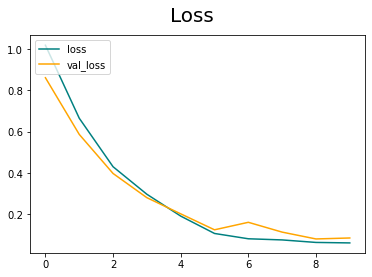

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [32]:
print(hist.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


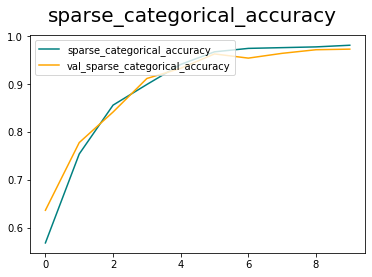

In [33]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='teal', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='orange', label='val_sparse_categorical_accuracy')
fig.suptitle('sparse_categorical_accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
len(batch)

1

In [38]:
for element in batch_data.as_numpy_iterator(): 
    X, y = element
    yhat = model.predict(X)
    pred = (np.argmax(yhat, axis=-1))
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)
    unique2, counts2 = np.unique(y, return_counts=True)
    dict(zip(unique2, counts2))
    # print (yhat)
    # print (y)

print (pred)

unique2, counts2 = np.unique(pred, return_counts=True)
dict(zip(unique2, counts2))

noInBatch= (len(pred))


[2 1 1 1 1 1 1 3 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1]


In [39]:
stats = dict(zip(unique2, counts2))
print (stats)

nbrBlotch = stats[0]
nbrNormal = stats[1]
nbrRot = stats[2]
nbrScab = stats[3]
nbrRej = int(nbrBlotch)+int(nbrRot)+int(nbrScab)

percBlotch = int(nbrBlotch)/int(noInBatch)*100
percNormal = int(nbrNormal)/int(noInBatch)*100
percRot = int(nbrRot)/int(noInBatch)*100
percScab = int(nbrScab)/int(noInBatch)*100
percRej = int(nbrRej)/int(noInBatch)*100

if noInBatch != 80:
    
    print ("Please offer a batch of 80 apples for a correct quality control")

else:
    if nbrNormal >= 89: #79:                                          
        batchStatus = (f'The batch has been qualified as: Class 1\n , this is suitable for supermarkets and greengrocers.')
    elif nbrNormal >= 75: #75:
        batchStatus = (f'The batch has been qualified as: Class 2\n , this is suitable to be used in apple sauce.')
    elif nbrNormal >= 73: #73:
         (f'The batch has been qualified as: Class 3\n, this is suitable to be used in apple syrup.')
    else:
        batchStatus = (f'The batch has been rejected\n, this is too bad for you.')
    
print (batchStatus)

print (noInBatch)
print (nbrRej)
print (percRej)

{0: 4, 1: 70, 2: 3, 3: 3}
The batch has been rejected
, this is too bad for you.
80
10
12.5


voorbeeld om in andere files dingen te gaan ophalen.
 math.ceil(0.9)
in file 1 heb je de functie voor stats

in file 2: import 422

dan lager in 2

in file 2: 422.functie voor stats()

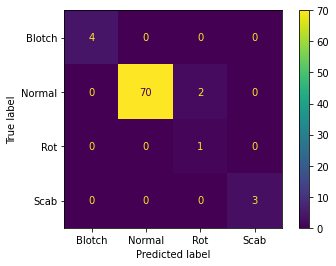

In [40]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [ ]:
testscore = model.evaluate(test_data)

1/1 [==============================] - 0s 311ms/step - loss: 2.1869 - sparse_categorical_accuracy: 0.6250


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

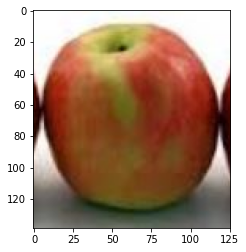

In [ ]:
img = cv2.imread('data/Test/Normal_Apple/Normal_Apple12.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

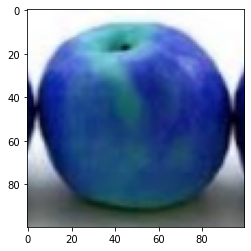

In [ ]:
resize = tf.image.resize(img, (100,100))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
pred = np.argmax(yhat, axis=-1)

In [ ]:
if pred == [3]: print ('the model predicts an apple with scab')
elif pred == [2]: print ('the model predicts an apple with rot')
elif pred == [1]: print ('the model predicts this is a normal healthy apple')
elif pred == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with scab


if num > 0:
    print("Positive number")
elif num == 0:
    print("Zero")
else:
    print("Negative number")

# 11. Save the Model and test loading the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','appleclassifier422Dropout03augmented.h5'))

In [ ]:
new_model = load_model('models/appleclassifier422Dropout03augmented.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 32)      

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
pred_new = np.argmax(yhat_new, axis=-1)

In [ ]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with scab


De vragen die ik bij 2_1 nog had zijn beantwoord door uitwerking 

Nieuwe vraag:

voor het aanmaken van de data moet ik soms onderstaand commando runnen bij foutmelding:

find . -name "*.DS_Store" -type f -delete

wat is dit?


Van to do 1_2 zijn confusion matrix en plots afgehandeld

new to do - 
To do - image rescalen naar 100x100
expirimenteren met model / dataset en augmentation
transfer learning